In [1]:
from pathlib import Path

import pandas as pd

from domain_validation import validate_gisoo


## File Setup Instructions

1. Assign the names of:
   - the validation file (CSV, currently based on census data)
   - the processed district file (GeoJSON).

2. Both files must be placed inside a folder named `input_files`.

3. The `input_files` folder must be located in the **same directory** as this Jupyter notebook (i.e., the directory where you launched JupyterLab).

The current census input is `filtered_census.csv` inside `input_files`.

Make sure your code refers to these files using filenames only (not full paths), for example:

```python
validation_csv_path = 'filtered_census.csv'
processed_district_path = 'your_processed_district_file.geojson'
```


In [2]:
validation_csv_path = 'filtered_census.csv'
processed_district_path = 'QuebecCity.geojson'


## Assigning Field Titles Based on the Validation File

Using the CSV validation file, assign the appropriate field names to the variables in the cell below for:
- FSA
- number of private dwellings

(The cell below is pre-filled with values corresponding to the Quebec census data.)


In [3]:
validation_file_fsa = 'ALT_GEO_CODE'
units_num = 'C1_COUNT_TOTAL'


## Census Average Area Dictionary (Optional)

The census total area is derived from a dictionary of average areas per dwelling type.
Defaults are provided, but you can override any keys by passing a dictionary to `census_avg_area_by_type`.
If you leave it empty, the defaults are used.


In [1]:
# Default values

# census_avg_area_by_type = {
#     'Single-detached house': 160.0,
#     'Semi-detached house': 160.0,
#     'Row house': 120.0,
#     'Apartment or flat in a duplex': 95.0,
#     'Apartment in a building that has fewer than five storeys': 95.0,
#     'Apartment in a building that has five or more storeys': 95.0,
#     'Other single-attached house': 95.0,
#     'Movable dwelling': 95.0,
#     # If the below is not equal to 0.0, the calculation is
#     # based on total private dwellings. (synthetic parameter).
#     'Remaining dwellings': 0.0,
# }

# census_avg_area_by_type = {
#     # You can skip defining this dictionary for the above values.
#     # 
#     # 
# }


# test_2 
# census_avg_area_by_type = {
#     'Single-detached house': 198.0,
#     'Semi-detached house': 125.0,
#     'Row house': 135.0,
#     'Apartment or flat in a duplex': 75.0,
#     'Apartment in a building that has fewer than five storeys': 85.0,
#     'Apartment in a building that has five or more storeys': 75.0,
#     'Other single-attached house': 120.0,
#     'Movable dwelling': 75.0,
#      # If the below is not equal to 0.0, the calculation is
#      # based on total private dwellings. (synthetic parameter).
#     'Remaining dwellings': 0.0,
# }

# test_3 
# census_avg_area_by_type = {
#     'Single-detached house': 160.0,
#     'Semi-detached house': 125.0,
#     'Row house': 120.0,
#     'Apartment or flat in a duplex': 75.0,
#     'Apartment in a building that has fewer than five storeys': 85.0,
#     'Apartment in a building that has five or more storeys': 75.0,
#     'Other single-attached house': 120.0,
#     'Movable dwelling': 75.0,
#      # If the below is not equal to 0.0, the calculation is
#      # based on total private dwellings. (synthetic parameter).
#     'Remaining dwellings': 0.0,
# }




# test_4 
# census_avg_area_by_type = {
#     'Single-detached house': 160.0,
#     'Semi-detached house': 135.0,
#     'Row house': 120.0,
#     'Apartment or flat in a duplex': 75.0,
#     'Apartment in a building that has fewer than five storeys': 85.0,
#     'Apartment in a building that has five or more storeys': 75.0,
#     'Other single-attached house': 120.0,
#     'Movable dwelling': 75.0,
#      # If the below is not equal to 0.0, the calculation is
#      # based on total private dwellings. (synthetic parameter).
#     'Remaining dwellings': 0.0,
# }


## Assigning Field Titles Based on the Processed District

From the GeoJSON file of your processed district, assign the field names to the corresponding variables in the cell below for:
- postal code
- function
- area
- floor number


In [5]:
postal_code = 'CODE_POSTA'
function = 'function'
area = 'total_area'
floor_num = 'NBR_ETAGE'


## Assigning Value to the Function's Field

Set `function_value` to the function you want to validate.
For example, if you are looking for residential buildings and the value representing residential use is `"Logement"`, assign that string to `function_value`.


In [6]:
function_value = 'Logement'


## Instantiate the Validator


In [7]:
validate_beauport = validate_gisoo.ValidateGISOO(
    validation_csv_path,
    processed_district_path,
    validation_file_fsa,
    units_num,
    postal_code,
    function,
    function_value,
    area,
    floor_num,
    census_avg_area_by_type=census_avg_area_by_type,
)


## Comparison Table


In [8]:
codes = validate_beauport.district_codes
comparison_df = pd.DataFrame(validate_beauport.comparison_table(codes))
comparison_df


,FSA,Cleaned Units Num,Census Units Num,Cleaned vs. Census Units,Cleaned Total Area,Cleaned Total Area (with proxy),Census Total Area (by type)
0,G1Y,4441,5703.0,-1262.0,1079700.41,849507.47,786775.0
1,G1X,5226,13699.0,-8473.0,1916927.51,1602605.34,1534050.0
2,G3A,140,8604.0,-8464.0,26223.86,20141.24,1164725.0
3,G1T,1971,2937.0,-966.0,705963.08,572611.73,380300.0
4,G2E,1599,9337.0,-7738.0,239912.64,221259.80,1281675.0
5,G1C,10461,16886.0,-6425.0,2349681.03,1917031.46,2142550.0
6,G1K,2624,12884.0,-10260.0,1271878.91,1024735.08,1098675.0
7,G1V,2224,15426.0,-13202.0,1884060.19,1421310.57,1257975.0
8,G1E,5767,14733.0,-8966.0,1867291.07,1595249.50,1589375.0
9,G1G,7314,11493.0,-4179.0,1599586.16,1311676.57,1503550.0


## Save Comparison CSV


In [11]:
district_name = 'qubec_city'
validate_beauport.comparison_csv(codes, avg_area=90, distric_name=district_name)


## Save Area Comparison Plot


WindowsPath('output_files/Quebec_City_area_comparison.png')

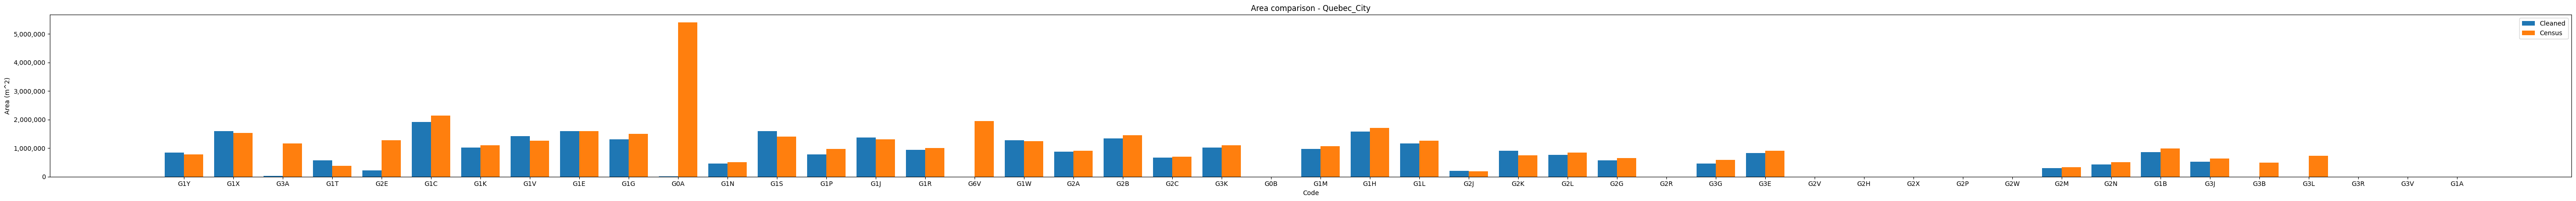

In [10]:
output_dir = Path("output_files")
output_dir.mkdir(exist_ok=True)

fig, ax = validate_gisoo.ValidateGISOO.plot_area_comparison(
    codes_info=comparison_df["FSA"],
    areas=comparison_df["Cleaned Total Area (with proxy)"],
    census_areas=comparison_df["Census Total Area (by type)"],
    title="Area comparison - Quebec_City",
    y_label="Area (m^2)",
    x_label="Cleaned",
)

plot_path = output_dir / "Quebec_City_area_comparison.png"
fig.savefig(plot_path, dpi=150)
plot_path
